In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import wfdb
import seaborn as sns
import copy as cp
import scipy.signal as signal
import pickle
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import csv
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("ticks")


In [2]:
record_list = [] # Initialize the array that will hold the list of our records

records = '/Users/maximilianwang/seabornlmao/mit-bih-dataframes/subject_list.csv' # Get our record list like we did in the initial extraction
with open(records) as rfile:# Load our records into the array
    for record in rfile:
        record = record[0:-1] # The -1 removes the newline ("\n") character from the string
        record_list.append(record)

In [3]:
subject_dataframes = [] # Initialize our dataframe array

for x in tqdm(record_list): # Extract our dataframes from the CSVs we saved previously
    subject_dataframes.append(pd.read_csv('/Users/maximilianwang/seabornlmao/mit-bih-dataframes/'+x+'.csv', index_col=0))
            # 'index_col=0' loads the index that is saved into the csv as the index rather than another column


  0%|          | 0/23 [00:00<?, ?it/s]/Users/maximilianwang/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 23/23 [01:50<00:00,  4.79s/it]


In [4]:
qrs = [] # Initialize the array that will hold our list of R-Peaks for each subject

for subject in tqdm(subject_dataframes): # Load each subject
    qrs.append([idx for idx, x in enumerate(subject['R-Peak']) if x])
    # Then we use list comprehension to get our r peaks for each subject

100%|██████████| 23/23 [00:29<00:00,  1.29s/it]


In [5]:
rr_ints = [] # Initialize the array that will hold all of our subjects' RR-Intervals

for idx, subj in enumerate(qrs):
    rr1 = []
    for idxs, r in enumerate(subj):
        if idxs == 0:
            next
        else:
            rr1.append(r-subj[idxs-1])
    rr_ints.append(rr1)
    
# Then we want to Go through all of our data that holds our R-Peaks [That will be the qrs array]
# Iterating through that we want to extract the interval between each peak. 
# My suggested format is: 
"""
for each subject:
    for each rpeak sample_num in my current subject:
        subject_rrinterval.append( rpeak sample_num - the sample_num before it)
"""


'\nfor each subject:\n    for each rpeak sample_num in my current subject:\n        subject_rrinterval.append( rpeak sample_num - the sample_num before it)\n'

In [6]:
rrints_dataframe = []
for idx, x in enumerate(tqdm(record_list)): 
    subj = pd.DataFrame(data=np.transpose(np.array(rr_ints[idx])), columns=["RR Intervals"])
    rrints_dataframe.append(subj)

100%|██████████| 23/23 [00:00<00:00, 197.32it/s]


In [7]:
reload_flag = False
for idx, x in enumerate(tqdm(record_list)): 
    if not os.path.exists("/Users/maximilianwang/seabornlmao/mit-bih-rrintervals/"+x+".csv") or reload_flag:
        rrints_dataframe[idx].to_csv("/Users/maximilianwang/seabornlmao/mit-bih-rrintervals/"+"subjects"+".csv")
        np.savetxt("/Users/maximilianwang/seabornlmao/mit-bih-rrintervals/"+x+".csv", np.array(rr_ints[idx]), delimiter=",")

100%|██████████| 23/23 [00:00<00:00, 21904.86it/s]


In [8]:
new_rrints = []
for subj in rr_ints:
    new_rrints.append([x for x in subj if x < 500])

In [9]:
dfdic = {}
for idx, x in enumerate(record_list):
    dfdic[x] = pd.read_csv('/Users/maximilianwang/seabornlmao/mit-bih-features/'+x+ '.csv', index_col=0)

In [ ]:
dfdicsus = dfdic['04015']
df = dfdicsus.drop(columns=['Signal 1','Signal 2'])
sl = pd.DataFrame(qrs)
dfafib = df[df.AFIB != False]
dfnormal = df[df.Normal != False]
dfother = df[df.Other != False]
sl = sl.append(dfafib)
sl = sl.append(dfnormal)
sl = sl.append(dfother)
sl = sl.sort_index()



In [10]:
subject_df = pd.DataFrame()
for idx, x in enumerate(record_list):
    subject_df = pd.concat([subject_df, dfdic[x]])
#subject_df = subject_df.drop(["Unnamed: 0.1"], axis=1)

In [430]:
subject_df['Mappedrhythmlabels'] = subject_df['rhythmLabel'].map({'Normal':0, 'Other':0, 'AFIB':1})

KeyError: 'rhythmLabel'

In [11]:
rhythm_dics = []
header_dics = []

for x in record_list:
    with open('/Users/maximilianwang/seabornlmao/mit-bih-extracted/'+x+'_rhythms.pkl', mode='rb') as infile:
        rhythm_dics.append(pickle.load(infile))
    with open('/Users/maximilianwang/seabornlmao/mit-bih-extracted/'+x+'_headers.pkl', mode='rb') as infile:
        header_dics.append(pickle.load(infile))

Text(0.5, 1.025, 'R-R Intervals By Subject')

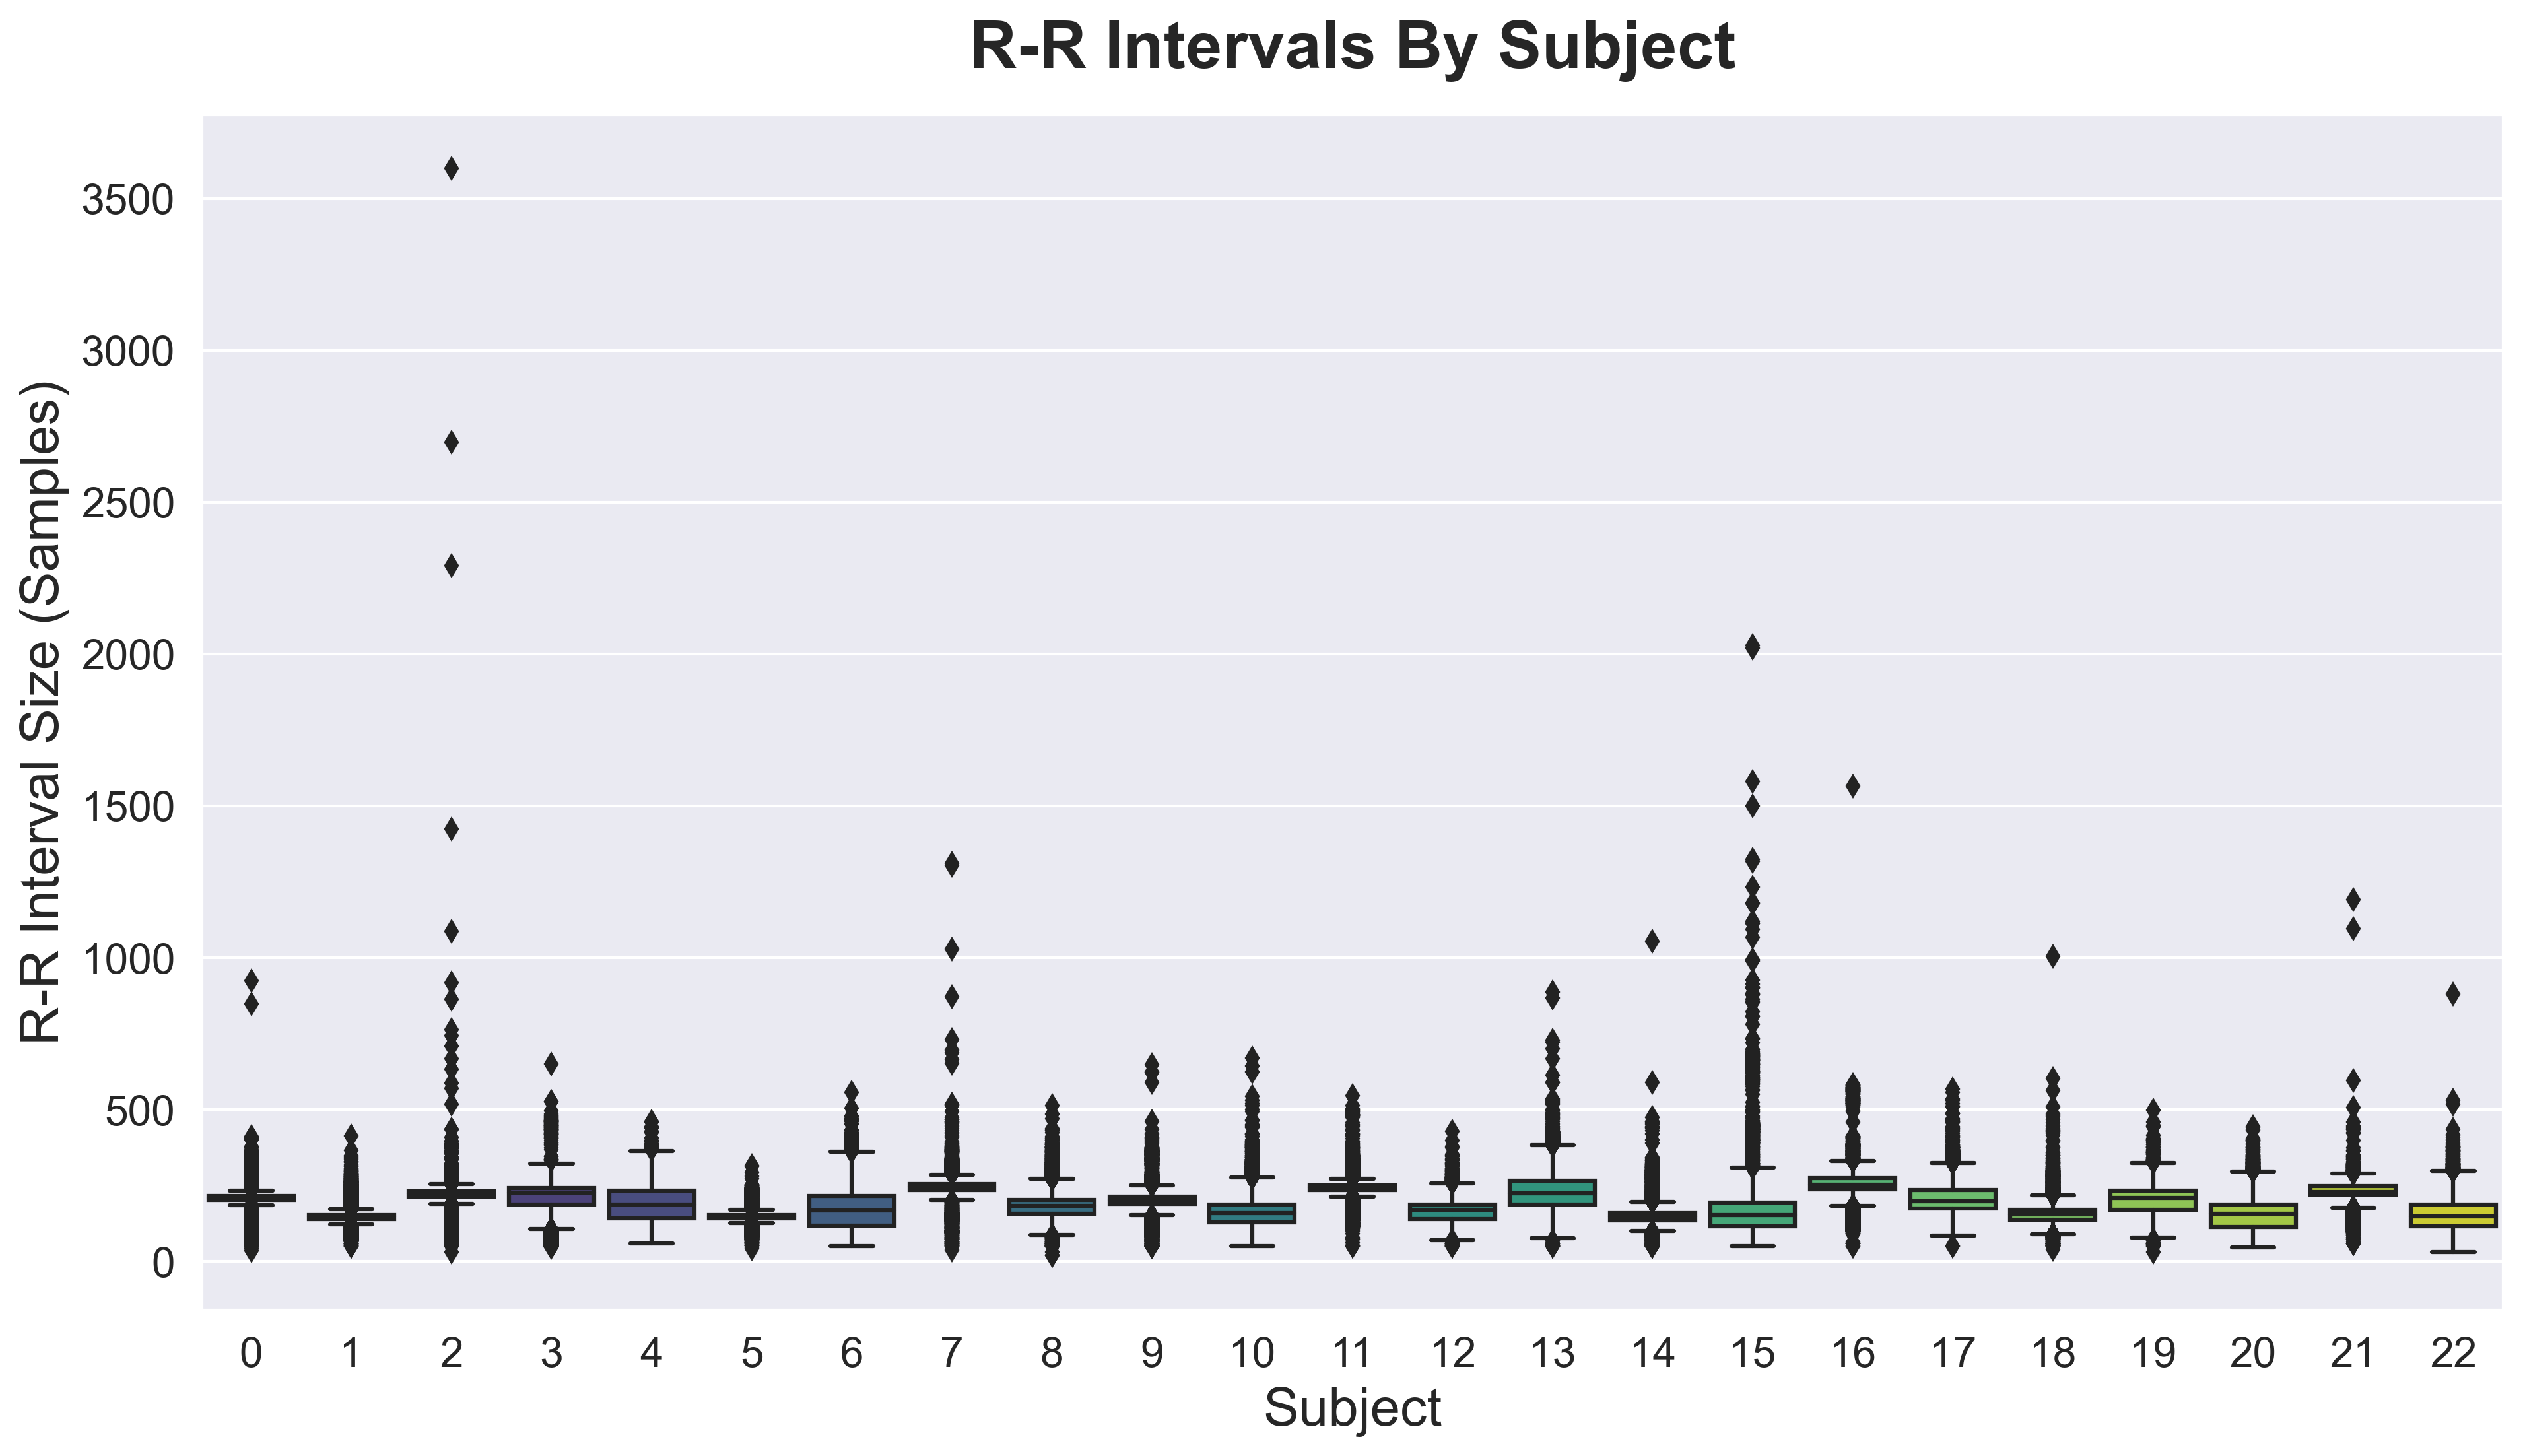

In [12]:
sns.set(font_scale=1.4, style="darkgrid")
ax = sns.boxplot(data=rr_ints, width=0.85, palette='viridis')
ax.set_xlabel("Subject", fontsize=19.5)
ax.set_ylabel("R-R Interval Size (Samples)", fontsize=19.5)
ax.set_title("R-R Intervals By Subject",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

Text(0.5, 1.025, 'R-R Intervals By Subject')

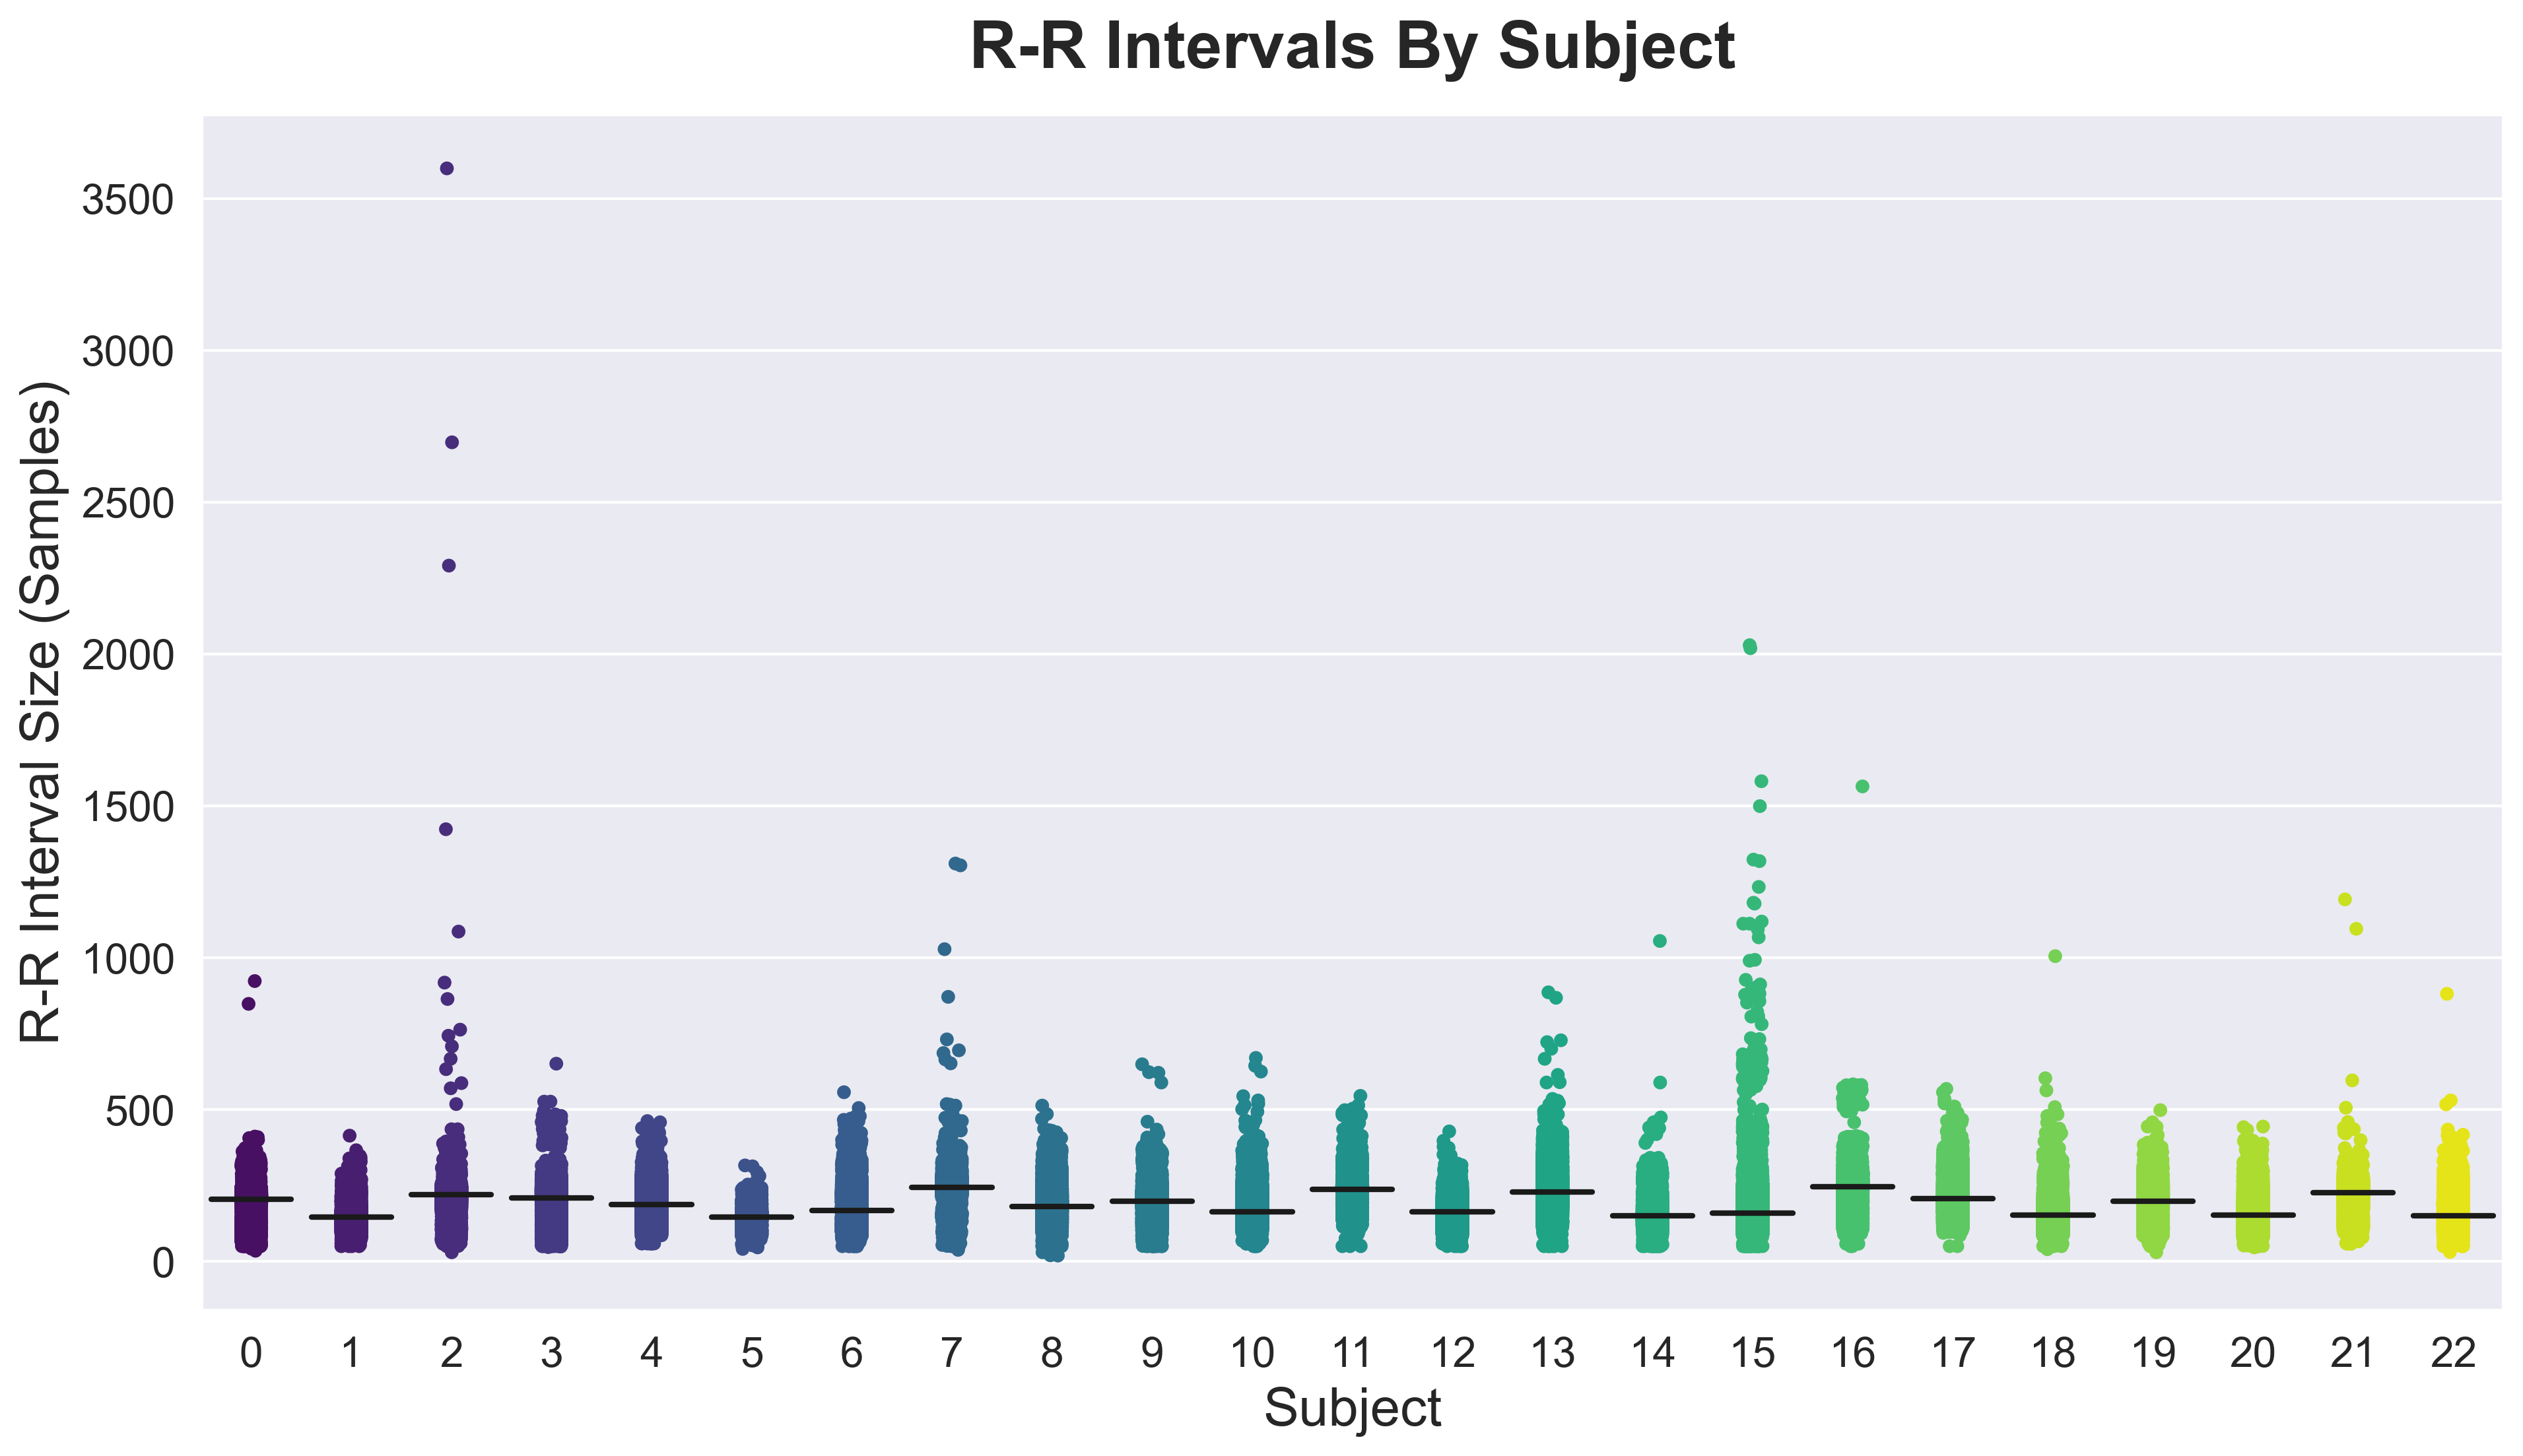

In [13]:
sns.set(font_scale=1.4, style="darkgrid", palette='vlag')
ax = sns.stripplot(data=rr_ints, dodge=True, palette='viridis',marker='o')
sns.boxplot(data=rr_ints,
            showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
ax.set_xlabel("Subject", fontsize=19.5)
ax.set_ylabel("R-R Interval Size (Samples)", fontsize=19.5)
ax.set_title("R-R Intervals By Subject",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

Text(0.5, 1.025, 'R-R Intervals for Subject 04015')

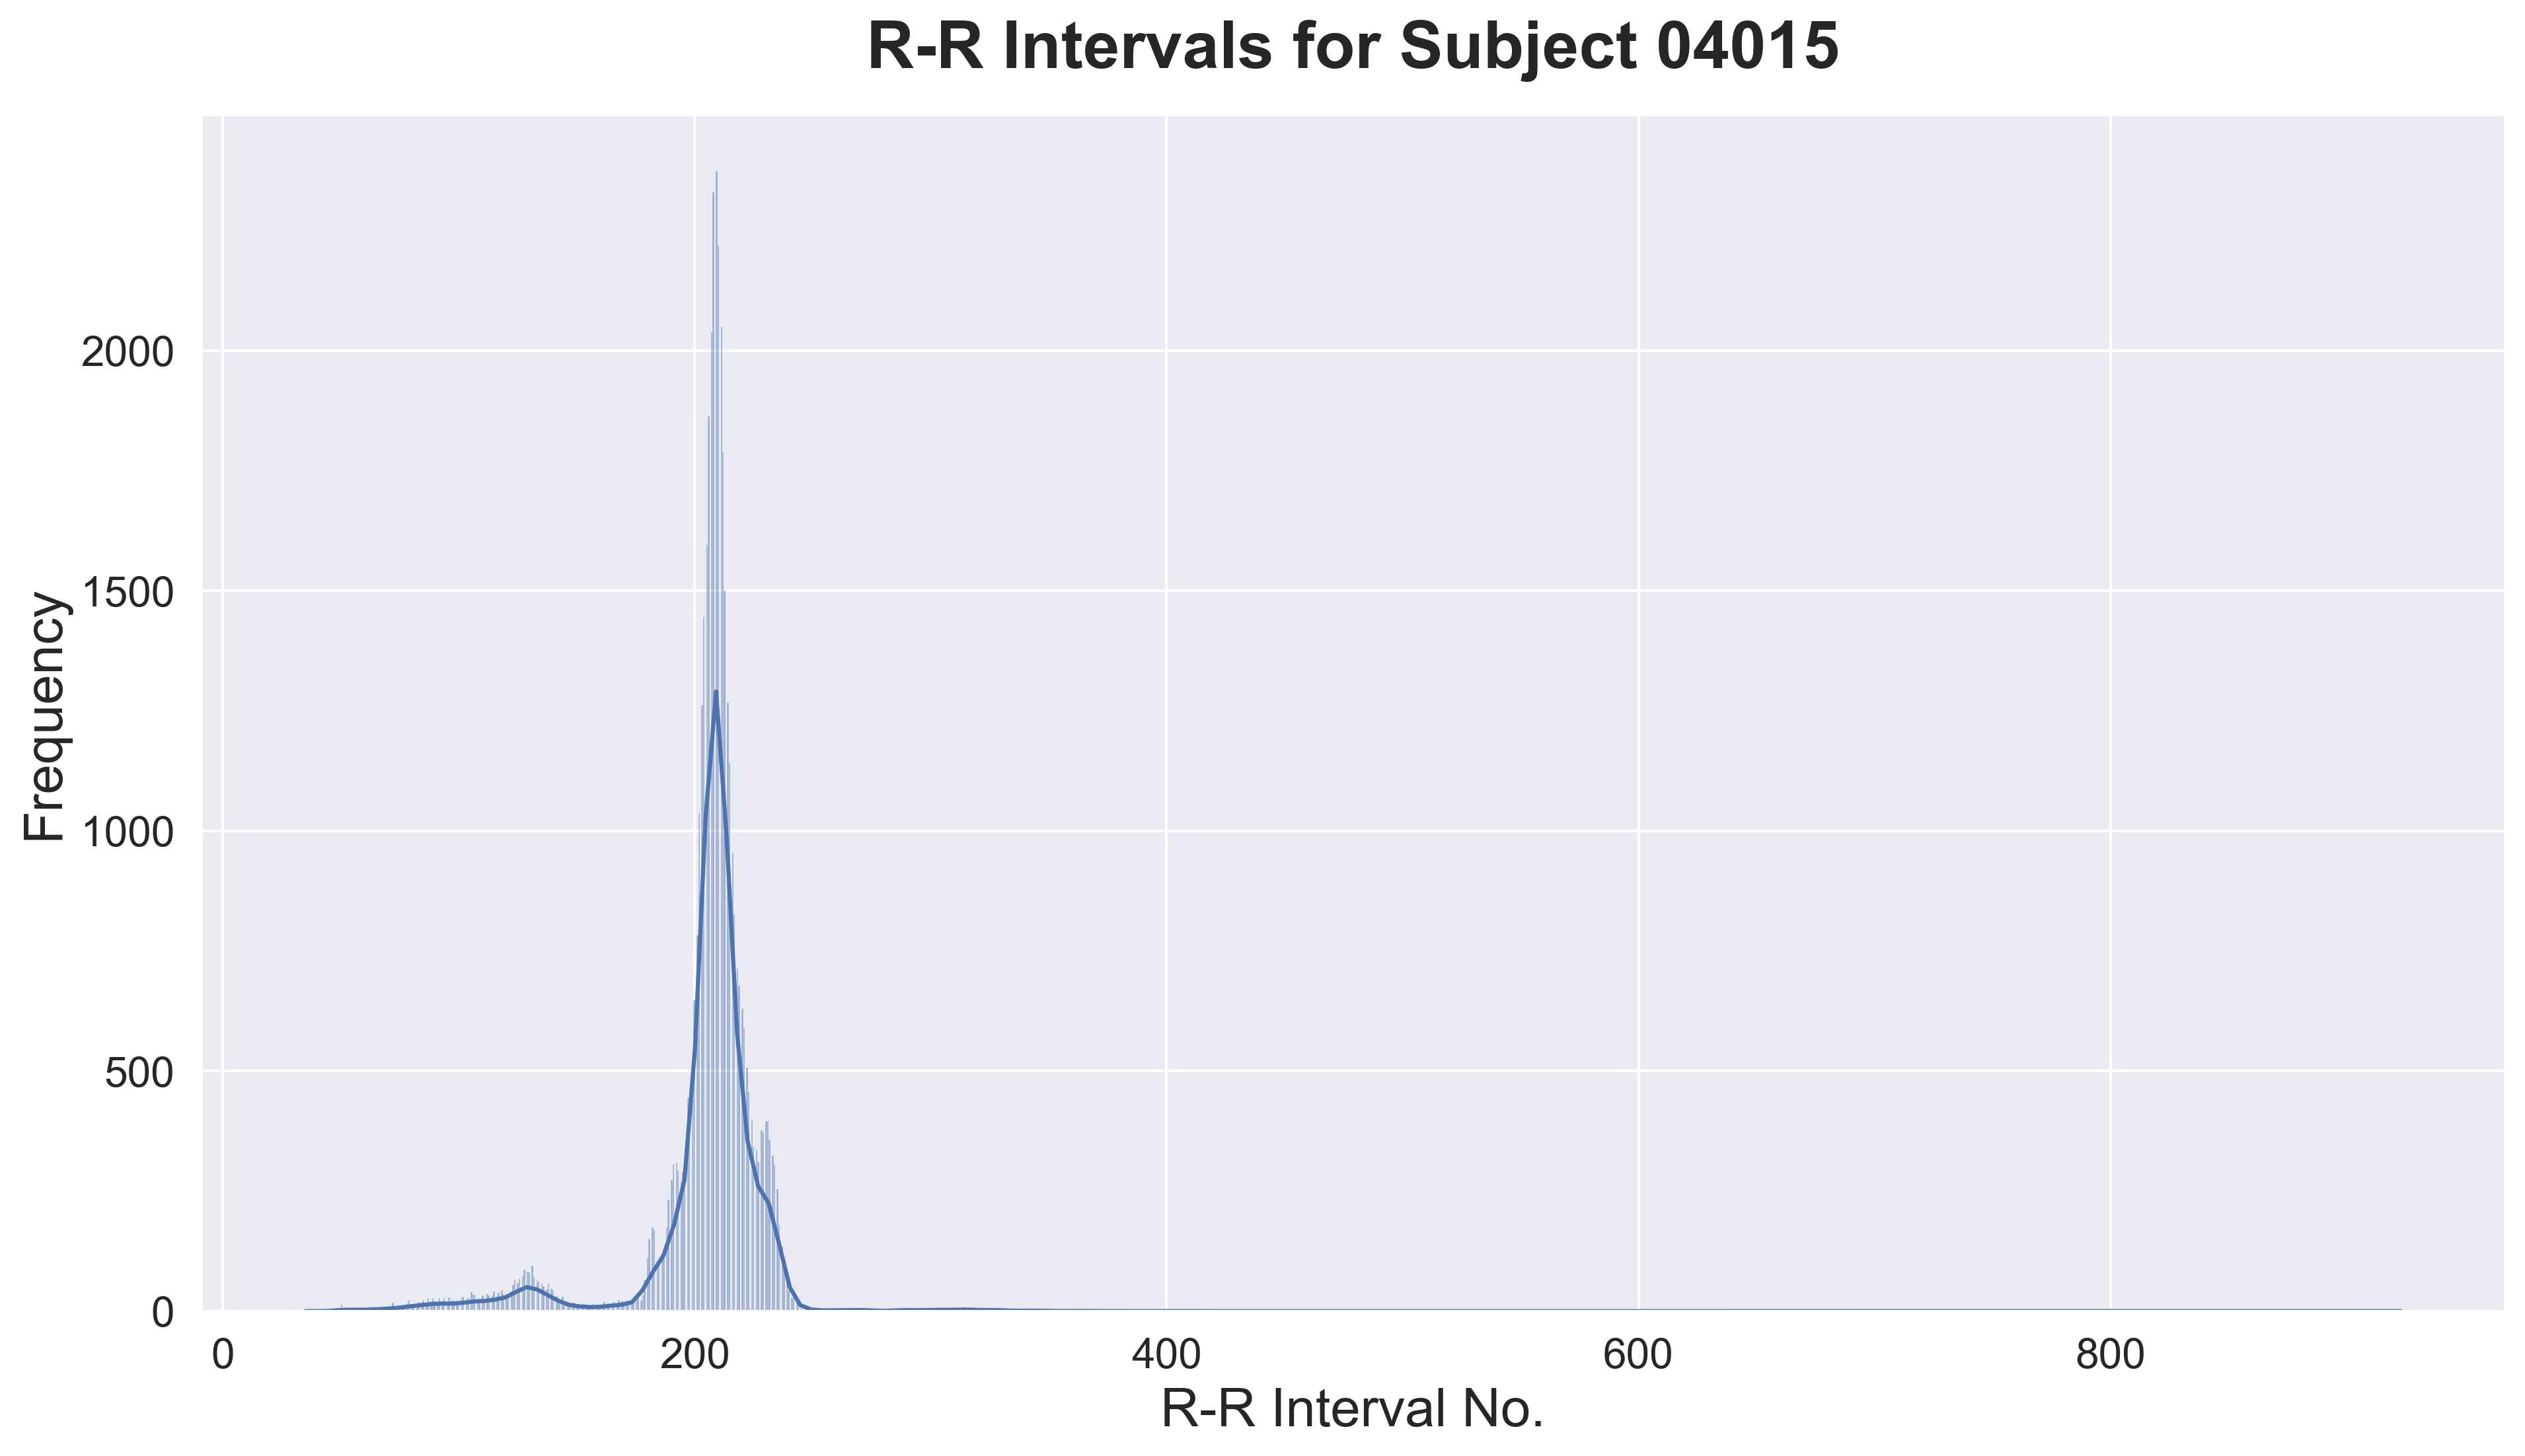

In [14]:
sns.set(font_scale=1.4, style="darkgrid")
ax = sns.histplot(x = rr_ints[0], kde=True, palette='viridis')
ax.set_xlabel("R-R Interval No.", fontsize=19.5)
ax.set_ylabel("Frequency",fontsize=19.5)
ax.set_title("R-R Intervals for Subject 04015",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)


Text(0.5, 1.025, 'R-R Intervals for Subject 04015')

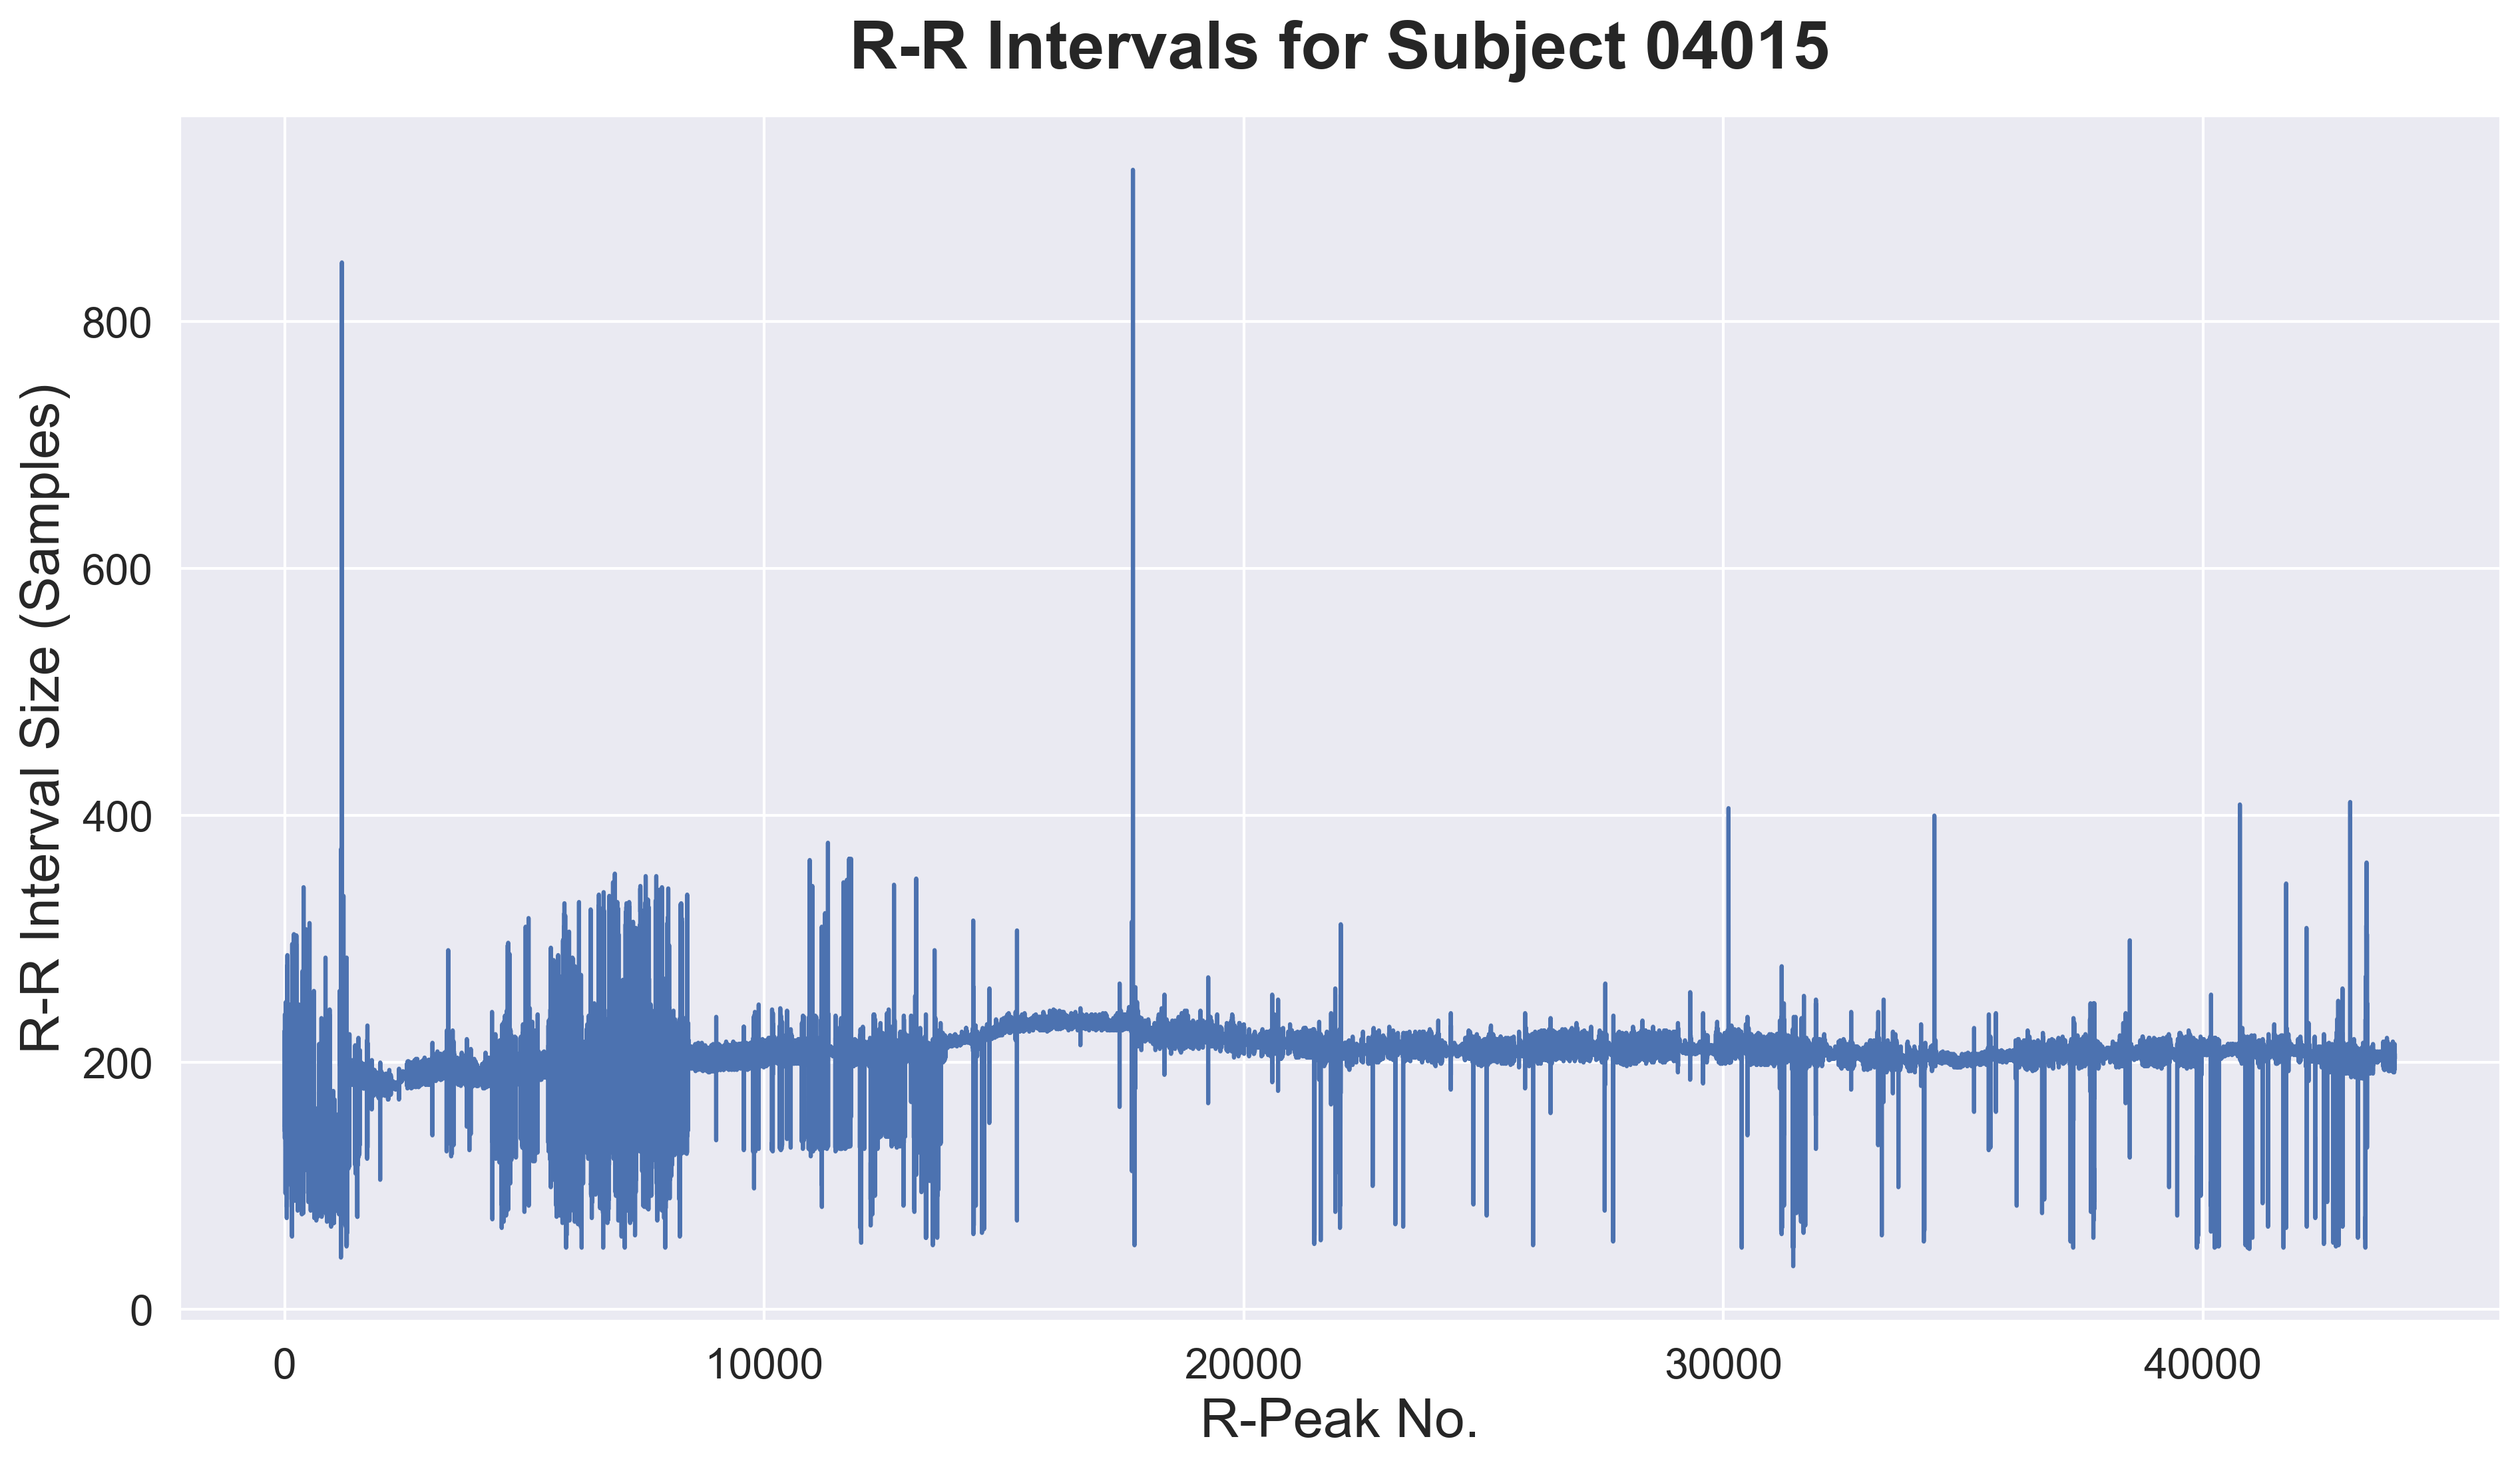

In [15]:
sns.set(font_scale=1.4, style="darkgrid")
ax = sns.lineplot(data=rr_ints[0])
ax.set_xlabel("R-Peak No.", fontsize=19.5)
ax.set_ylabel("R-R Interval Size (Samples)",fontsize=19.5)
ax.set_title("R-R Intervals for Subject 04015",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

In [154]:
#subject_df
subjectcode = '04043'
######################
dfdic2= pd.DataFrame(dfdic[subjectcode])
#dfdic.truncate(axis='1')

dfdic2 = dfdic2.drop(columns='Signal 1')
cr = dfdic2.drop(columns='Signal 2')
cr = cr[cr['R-Peak'] != False]
cr2 = cr.drop(columns='R-Peak')
dfdic[subjectcode]

Signal 1  Signal 2  R-Peak  Normal   AFIB  Other
0          -0.415    -0.395   False   False  False   True
1          -0.415    -0.260   False   False  False   True
2          -0.430    -0.185   False   False  False   True
3          -0.445    -0.135   False   False  False   True
4          -0.460    -0.080   False   False  False   True
...           ...       ...     ...     ...    ...    ...
9205755     0.220    -0.130   False    True  False  False
9205756     0.200    -0.160   False    True  False  False
9205757     0.175    -0.140   False    True  False  False
9205758     0.080    -0.160   False    True  False  False
9205759    -0.030    -0.250   False    True  False  False

[9205760 rows x 6 columns]

In [156]:
subjectnumber = 1
##################
x=len(rr_ints[subjectnumber])
bb=list(range(0,x))
rrintsdata={'No':bb,
      'RR':rr_ints[subjectnumber]}
  
# Load data into DataFrame
dfs = pd.DataFrame(rrintsdata)
dfs


No   RR
0          0  140
1          1  140
2          2  141
3          3  139
4          4  138
...      ...  ...
61909  61909  156
61910  61910  157
61911  61911  154
61912  61912  154
61913  61913  154

[61914 rows x 2 columns]

In [157]:
df_allcolors=[]
for idx, subj in enumerate(tqdm(qrs)):
    df_color=[]
    for x in subj:
        if subject_dataframes[idx].loc[x, 'Normal']:
            df_color.append('Normal')
        elif subject_dataframes[idx].loc[x, 'AFIB']:
            df_color.append('AFIB')
        else:
            df_color.append('Other')
    df_allcolors.append(df_color)

100%|██████████| 23/23 [00:21<00:00,  1.08it/s]


In [132]:
varilist=list(range(0,22))
varilist.remove()
colorz = pd.DataFrame(df_allcolors)
colorz=colorz.drop([0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],axis=0)
colorz=colorz.T
colorz.columns=['Rhythm']
comdata = pd.concat([dfs, colorz], axis=1, join='inner')

No   RR  Rhythm
0          0  140  Normal
1          1  140  Normal
2          2  141  Normal
3          3  139  Normal
4          4  138  Normal
...      ...  ...     ...
61909  61909  156  Normal
61910  61910  157  Normal
61911  61911  154  Normal
61912  61912  154  Normal
61913  61913  154  Normal

[61914 rows x 3 columns]

Text(0.5, 1.025, 'R-R Intervals for Subject 04043')

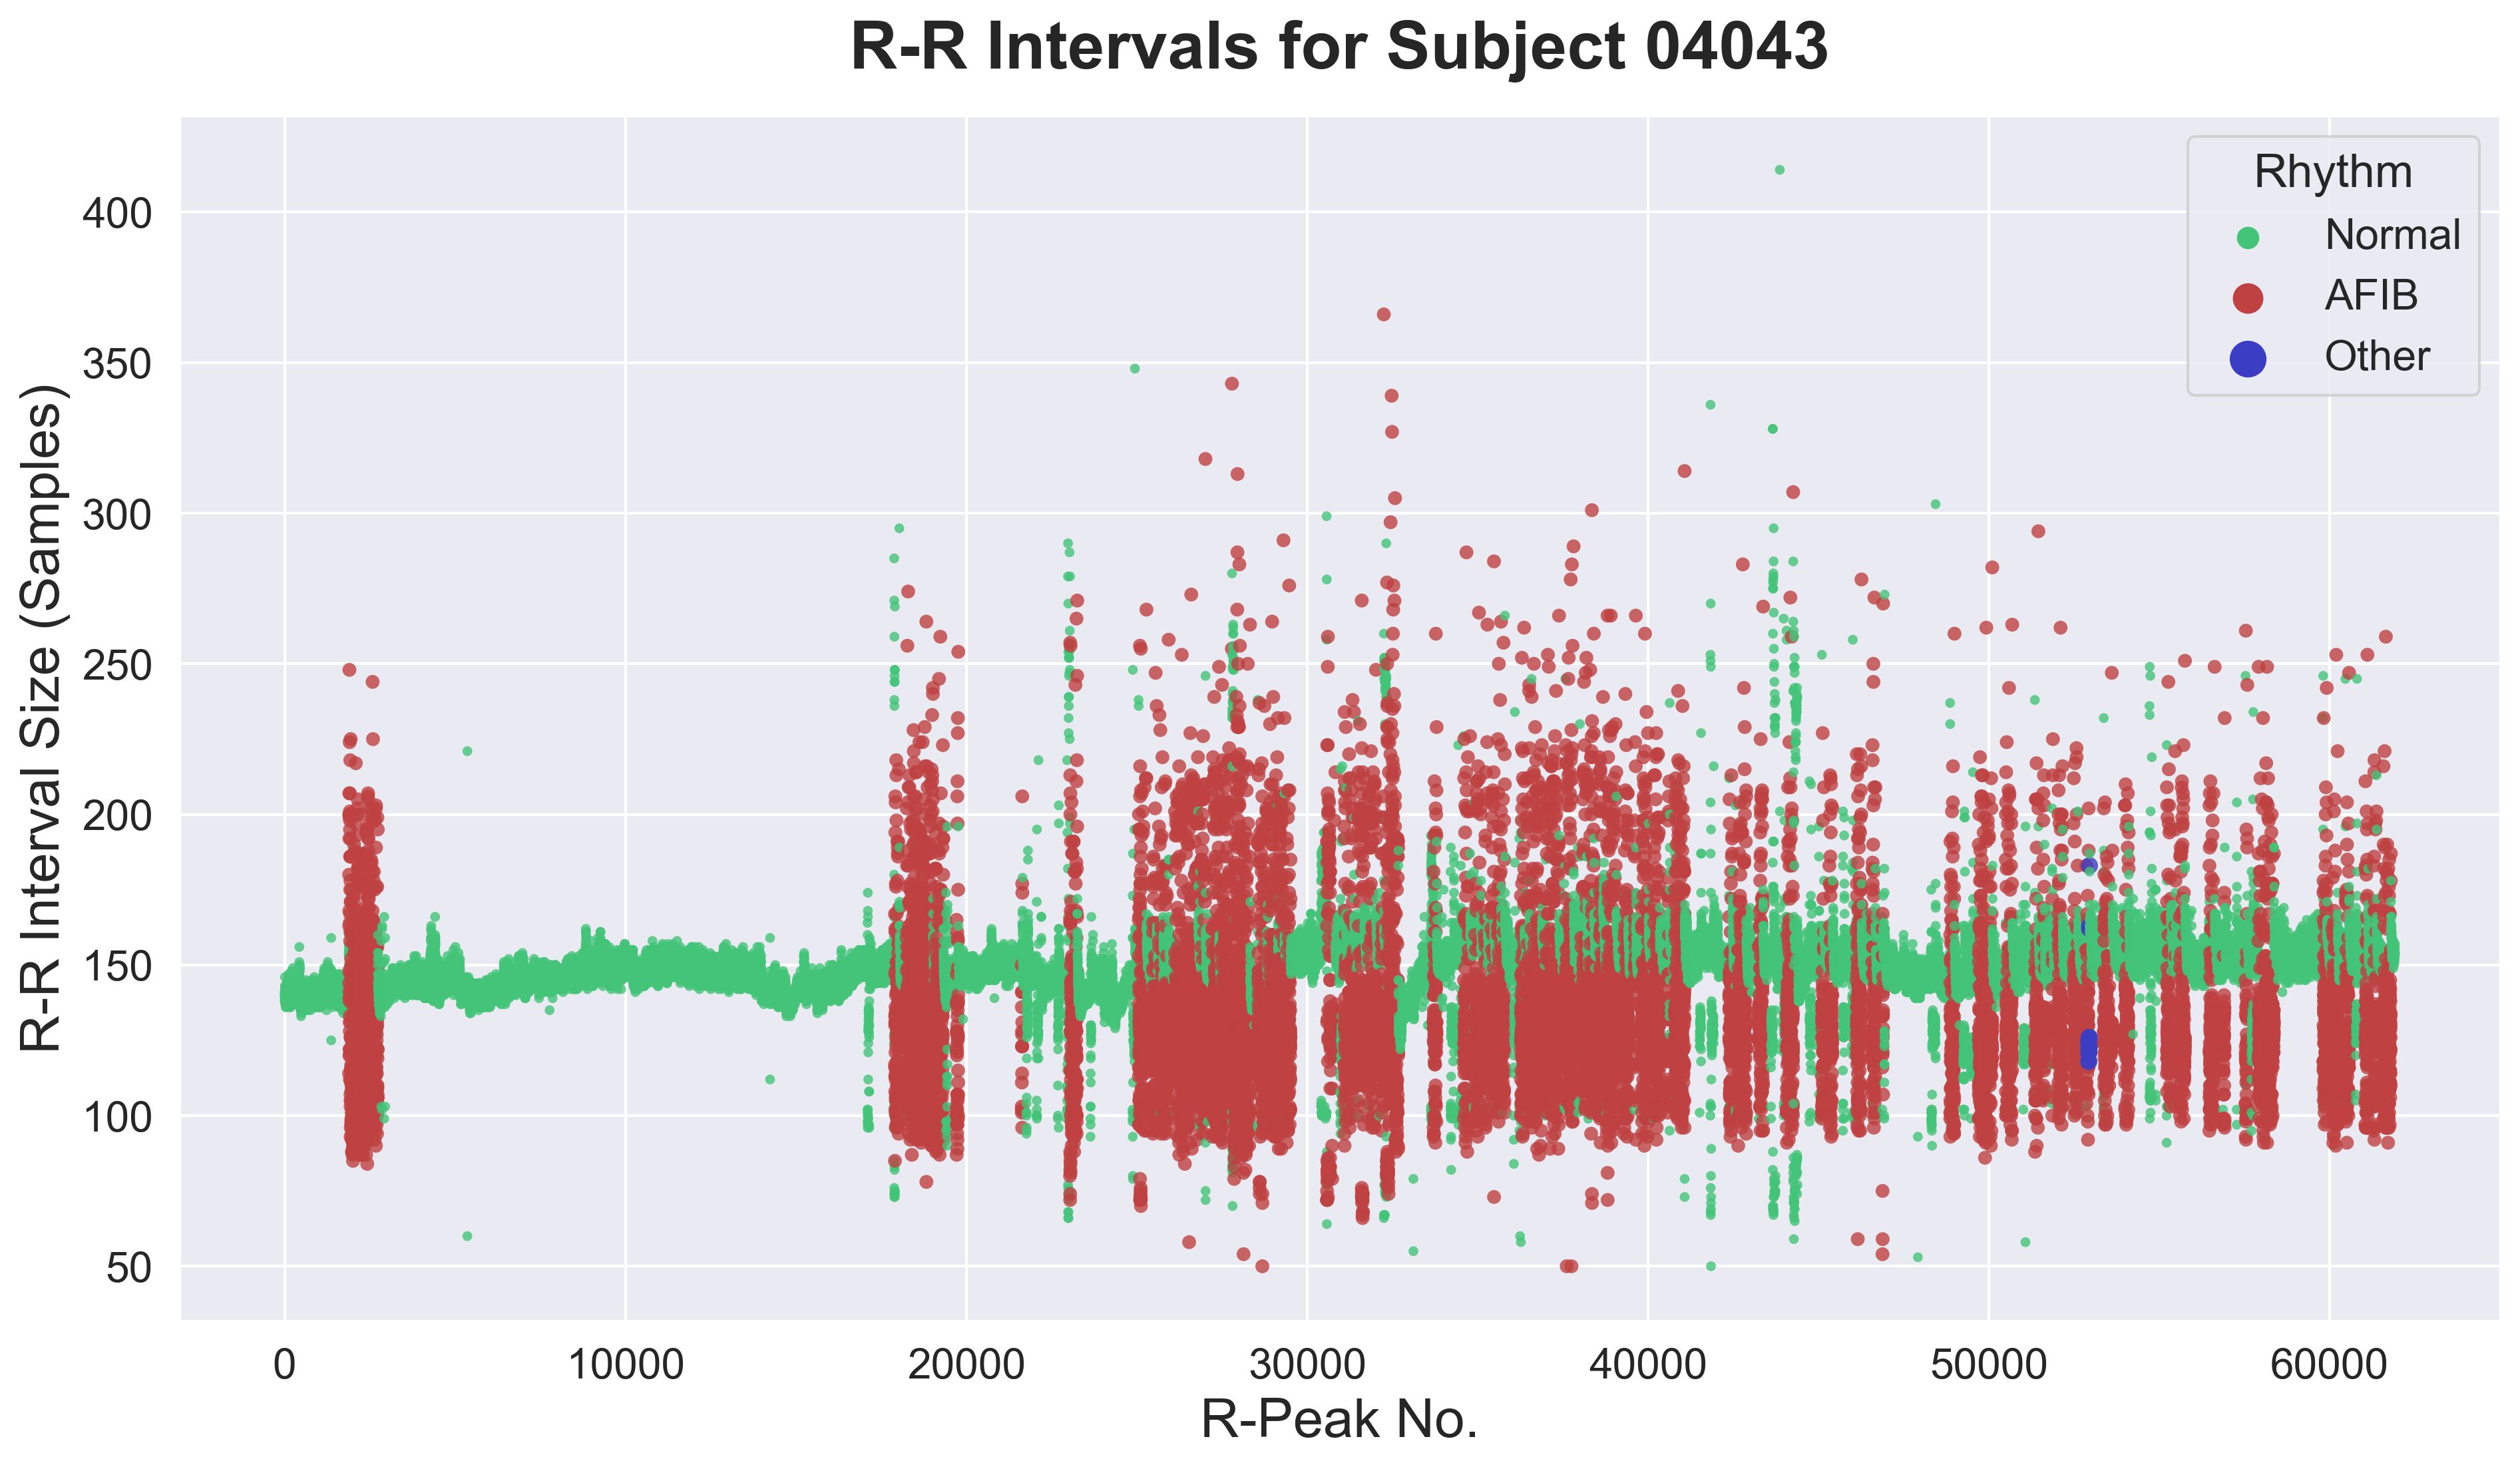

In [151]:
###STILL GETTING COLOR CODING
sns.set(font_scale=1.4, style="darkgrid")
ax = sns.scatterplot(data=comdata,x='No',y='RR',marker='.',size='Rhythm',sizes=(150,50),alpha=0.8,edgecolor='none',hue='Rhythm',palette=dict(Normal="#43c479", AFIB="#bf4141", Other="#3b3dc4"))
ax.set_xlabel("R-Peak No.", fontsize=19.5)
ax.set_ylabel("R-R Interval Size (Samples)",fontsize=19.5)
ax.set_title("R-R Intervals for Subject 04043",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

In [20]:
###STILL GETTING COLOR CODING
sns.set(font_scale=1.4, style="darkgrid")
#ax = sns.scatterplot(x=rr_ints[0],marker="x", hue='value')
ax = sns.scatterplot(x=range(len(rr_ints[0])),y=rr_ints[0],marker="x",hue='x')
#ax = sns.scatterplot(data=rr_ints[0],marker="x")
ax.set_xlabel("R-Peak No.", fontsize=19.5)
ax.set_ylabel("R-R Interval Size (Samples)",fontsize=19.5)
ax.set_title("R-R Intervals for Subject 04015",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

ValueError: Could not interpret value `x` for parameter `hue`

Text(0.5, 1.025, 'Filtered R-R Intervals for Subject 04015')

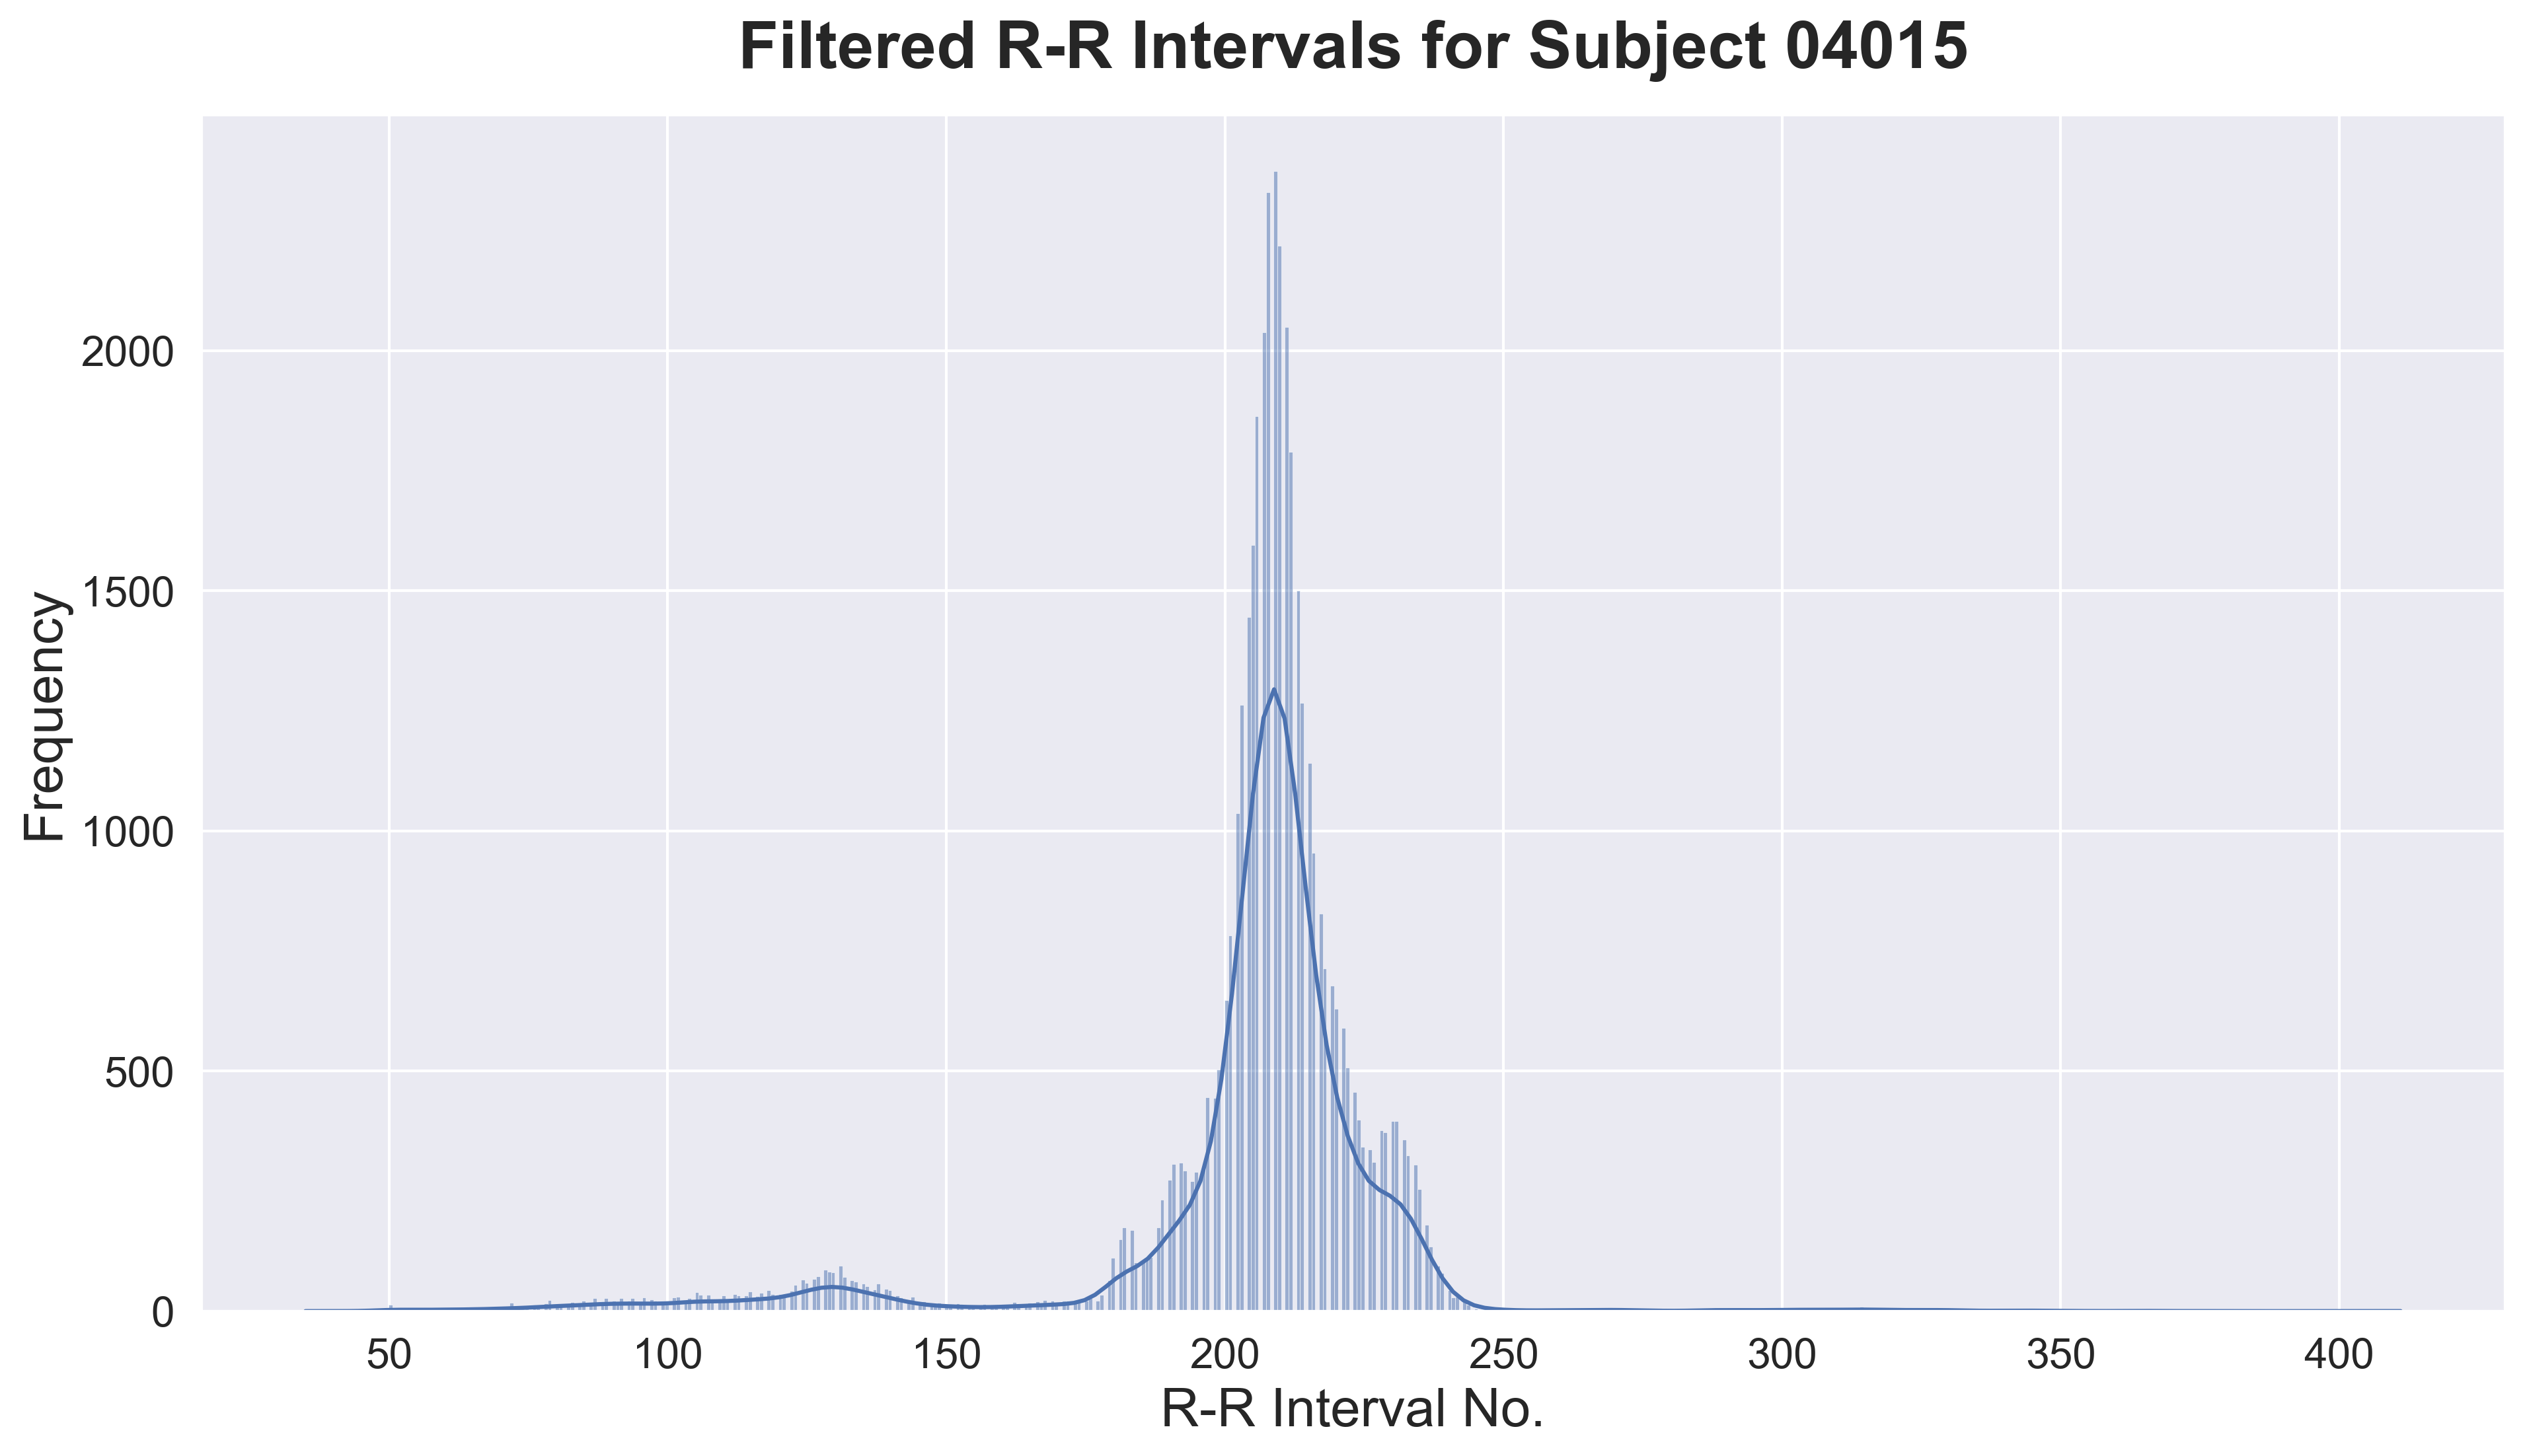

In [22]:
sns.set(font_scale=1.4, style="darkgrid")
ax = sns.histplot(x = new_rrints[0], kde=True)
ax.set_xlabel("R-R Interval No.", fontsize=19.5)
ax.set_ylabel("Frequency",fontsize=19.5)
ax.set_title("Filtered R-R Intervals for Subject 04015",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

Text(0.5, 1.025, 'Filtered R-R Intervals By Subject')

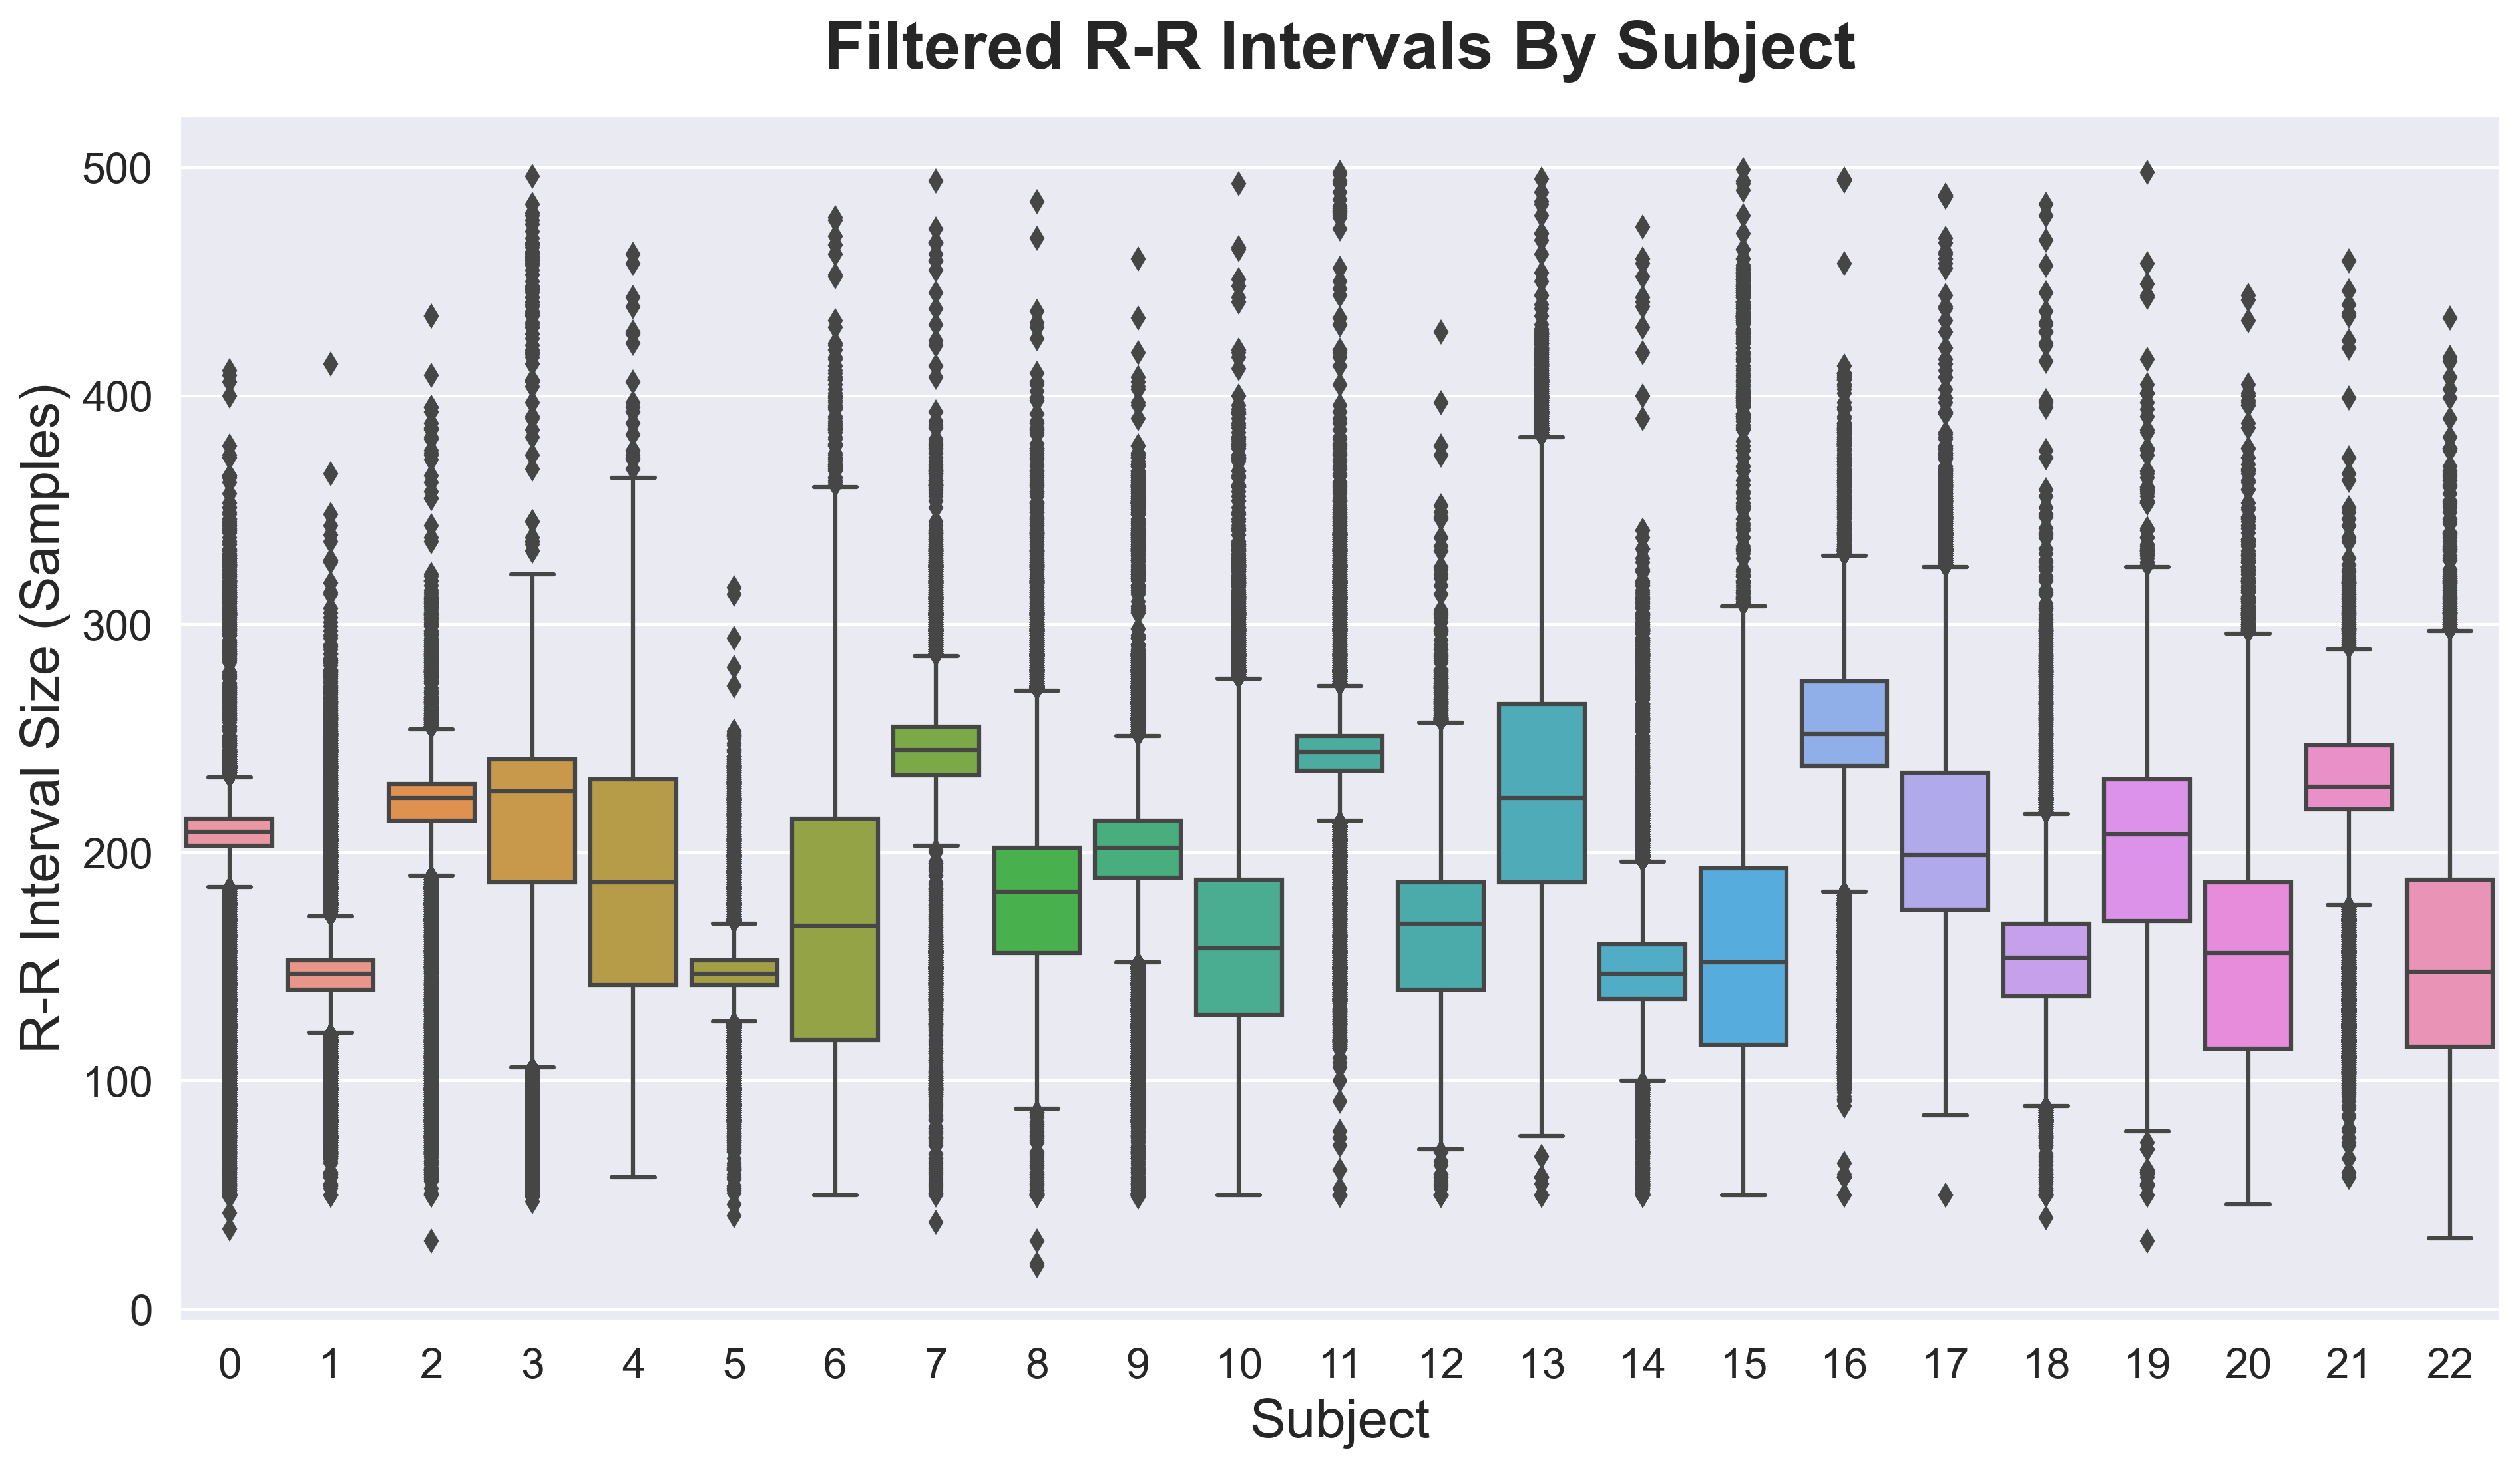

In [24]:
sns.set(font_scale=1.4, style="darkgrid")
ax = sns.boxplot(data=new_rrints, width=0.85)
ax.set_xlabel("Subject", fontsize=19.5)
ax.set_ylabel("R-R Interval Size (Samples)", fontsize=19.5)
ax.set_title("Filtered R-R Intervals By Subject",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

Text(0.5, 1.025, 'Filtered R-R Intervals By Subject')

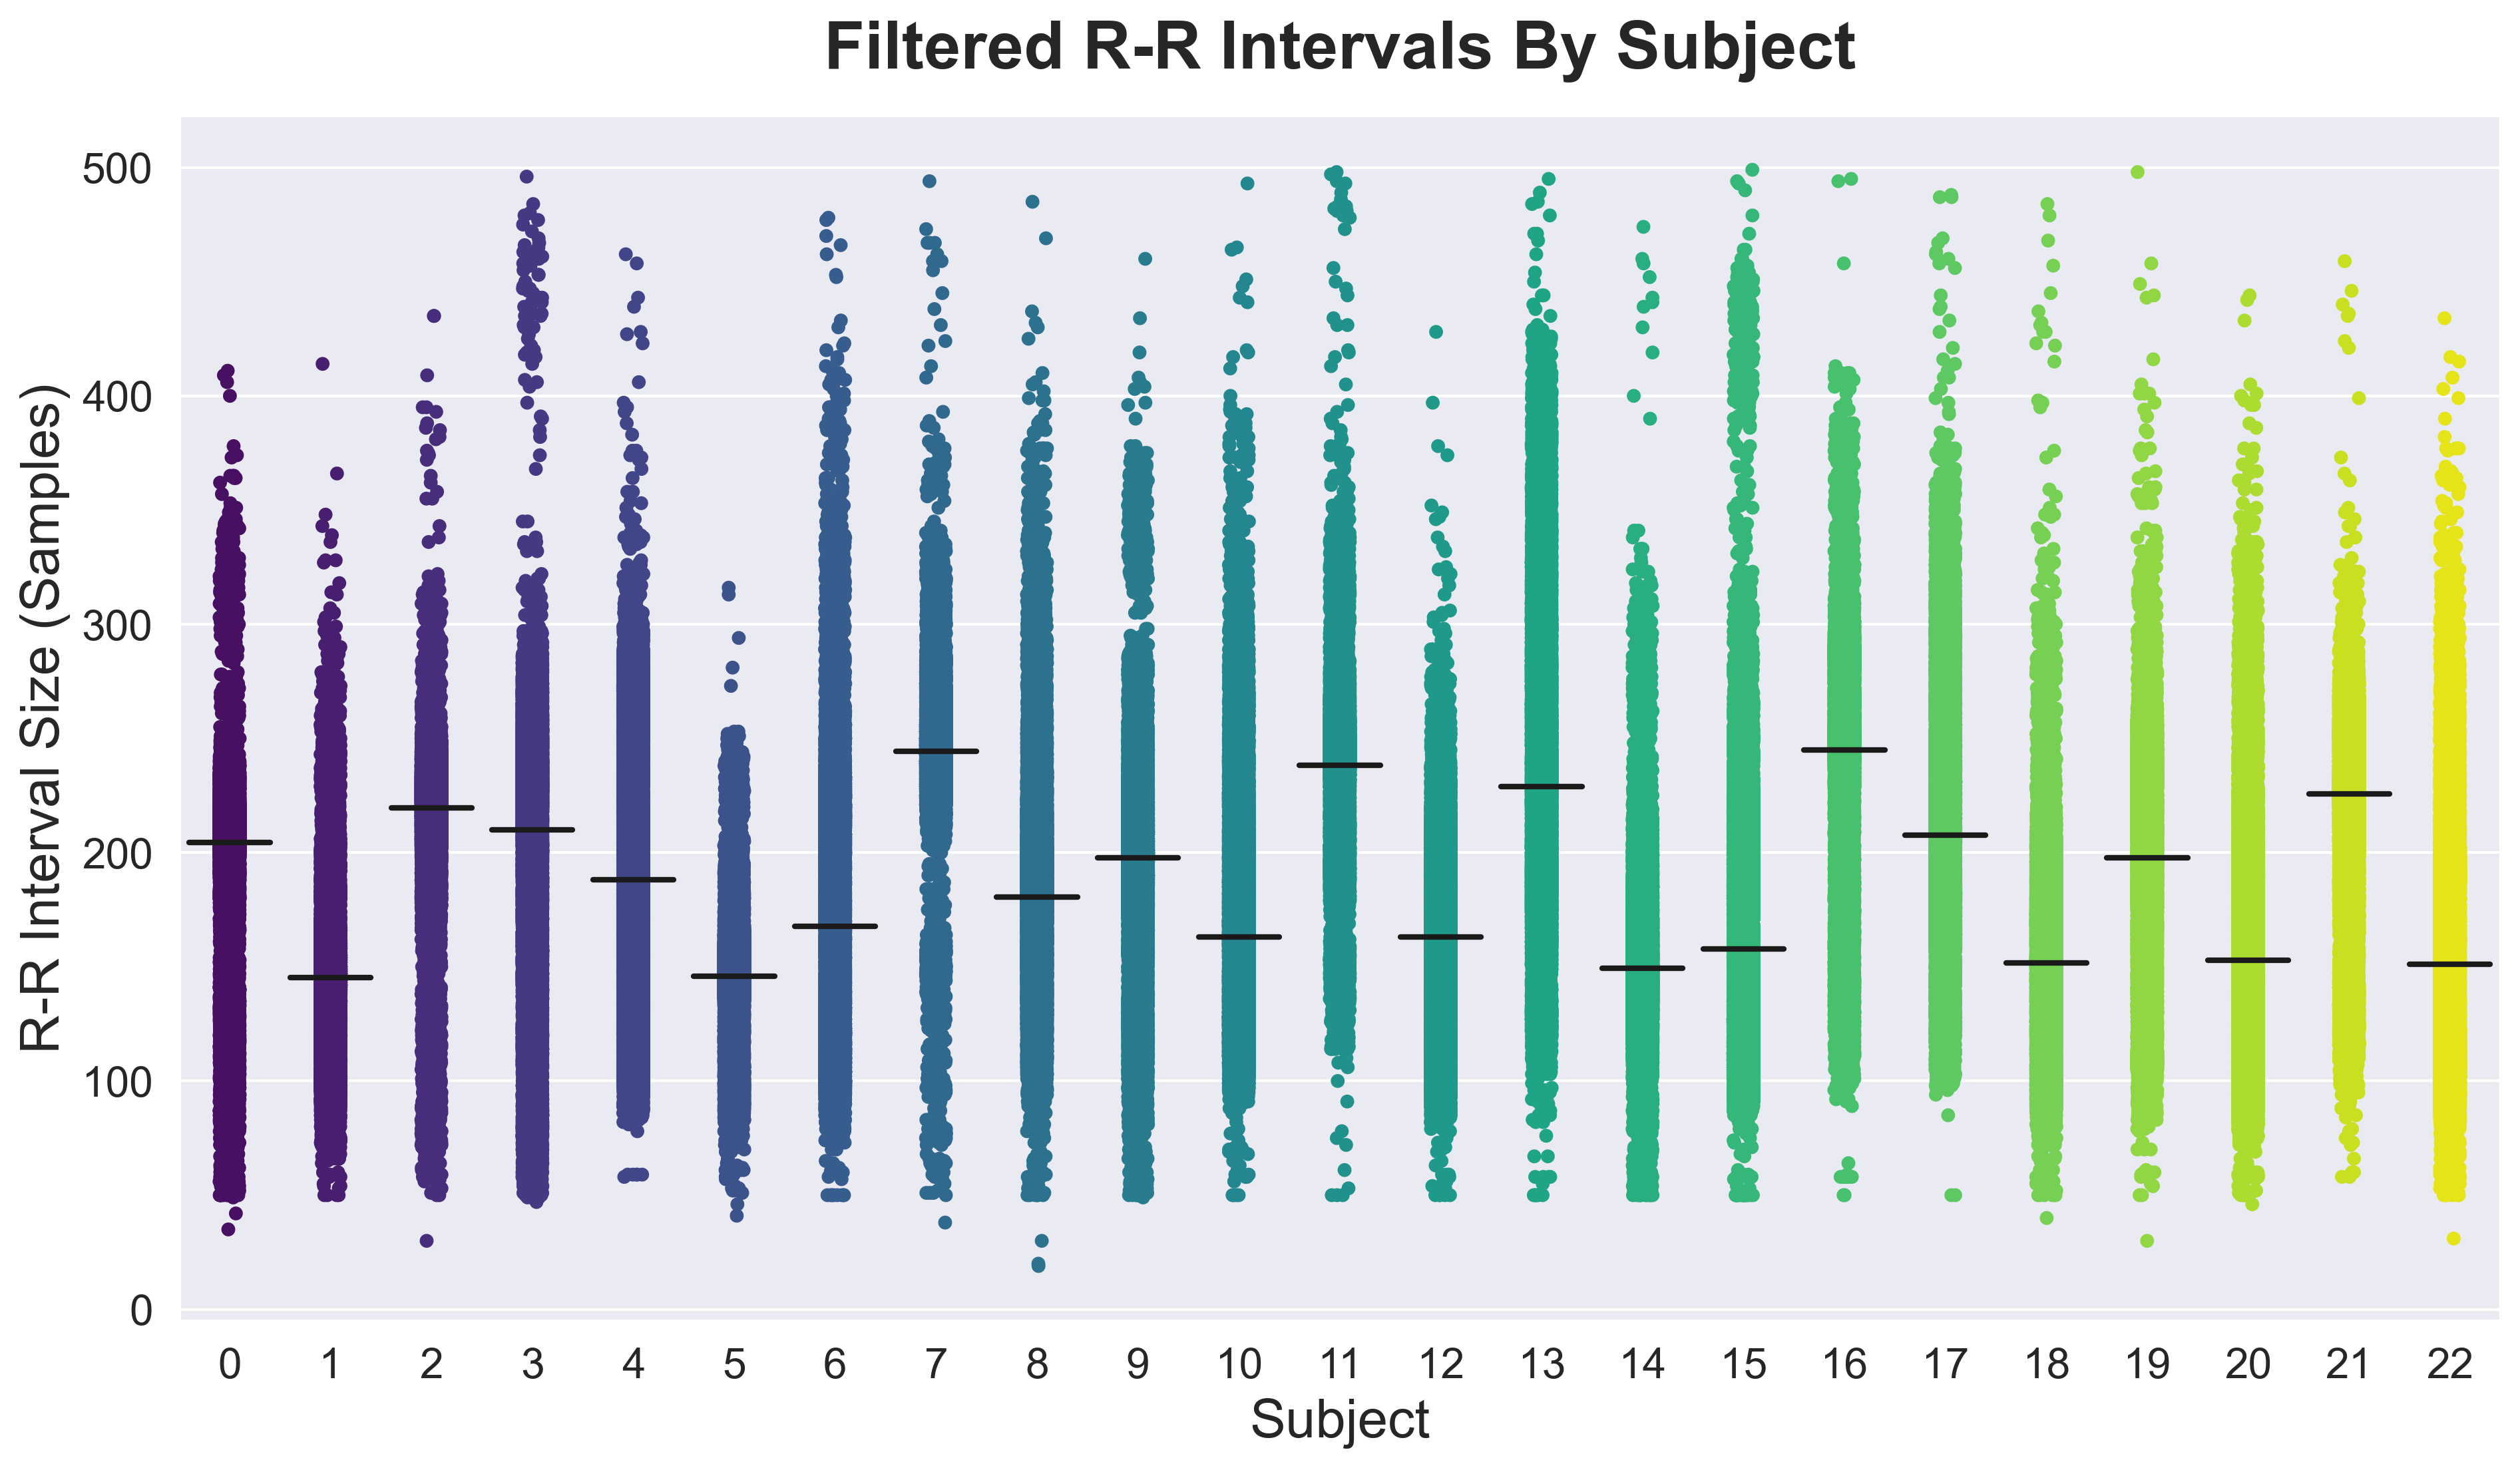

In [25]:
sns.set(font_scale=1.4, style="darkgrid", palette='vlag')
ax = sns.stripplot(data=new_rrints, dodge=True, palette='viridis',marker='o')
sns.boxplot(data=new_rrints,
            showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
ax.set_xlabel("Subject", fontsize=19.5)
ax.set_ylabel("R-R Interval Size (Samples)", fontsize=19.5)
ax.set_title("Filtered R-R Intervals By Subject",fontdict={'fontsize':24,'fontweight':'bold'},y=1.025)

In [372]:
fug=list(range(0,10))
print(fug)
len(fug)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


10

In [367]:
len(rr_ints[1])

61914

In [1]:
rrintsdata

NameError: name 'rrintsdata' is not defined

['No',
 [139,
  158,
  226,
  145,
  144,
  239,
  148,
  149,
  234,
  212,
  217,
  202,
  207,
  206,
  137,
  135,
  131,
  94,
  125,
  117,
  220,
  224,
  134,
  146,
  249,
  139,
  153,
  234,
  217,
  221,
  215,
  205,
  209,
  141,
  139,
  123,
  94,
  120,
  104,
  95,
  115,
  97,
  166,
  123,
  74,
  123,
  109,
  83,
  88,
  122,
  149,
  100,
  141,
  247,
  221,
  213,
  132,
  287,
  146,
  279,
  144,
  132,
  233,
  145,
  180,
  234,
  145,
  148,
  231,
  228,
  202,
  209,
  208,
  216,
  200,
  208,
  204,
  204,
  207,
  206,
  207,
  204,
  214,
  200,
  206,
  205,
  205,
  139,
  129,
  131,
  120,
  112,
  133,
  144,
  108,
  126,
  244,
  141,
  192,
  237,
  134,
  166,
  240,
  135,
  138,
  230,
  137,
  138,
  119,
  107,
  189,
  245,
  138,
  195,
  237,
  135,
  190,
  239,
  136,
  153,
  242,
  139,
  132,
  145,
  125,
  107,
  109,
  151,
  247,
  141,
  149,
  243,
  219,
  219,
  217,
  217,
  212,
  134,
  137,
  122,
  102,
  115,
  141,

AttributeError: 'list' object has no attribute 'drop'